In [1]:
"""
The Sequence of the notebook
1- read the dataset
2- explore it
3- plot distribution of features
4- train test split

"""

'\nThe Sequence of the notebook\n1- read the dataset\n2- explore it\n3- plot distribution of features\n4- train test split\n\n'

### Data visualization and Gain insights

In [2]:
#importing pandas library which will used in some preprocessing steps
import pandas as pd
import numpy as np

In [3]:
#read the dataset
housing = pd.read_csv("housing.csv")
housing.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
"""
The info() method prints information about the DataFrame. 
The information contains:
    1) the number of columns, 
    2) column labels [names of columns] , 
    3) column data types [float int or string ] 
    4) memory usage
    5) range index, and 
    6) the number of cells in each column (non-null values).
"""
# NOTE: 
# total_bed rooms attribute has only 20,433 nonnull values, meaning that 207 districts are missing
# ocean_proximity field. Its type is object, it will almost string type. also it will be categorical feature
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
"""you probably noticed that the values in the ocean_proximity column were repetitive,
which means that it is probably a categorical attribute. You can find out what categories exist 
and how many districts belong to each category by using the value_counts() """

housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
"""The describe() method shows a summary of the numerical attributes"""

"""
1- Note that the null values are ignored (so, for example, the count of total_bedrooms is 20,433, not 20,640). 
2- The std row shows the standard deviation, which measures how dispersed the values are.12
3- The 25%, 50%, and 75% rows show the corresponding percentiles: 
    * a percentile indicates the value below which a given percentage of observations in a group of observations fall. 
    * For example, 25% of the districts have a housing_median_age lower than 18, while 50% are lower than 29 and 
    75% are lower than 37. 
    * These are often called the 25th percentile (or first quartile), the median, and the 75th percentile (or third quartile)."""

housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

A histogram is a statistical graph that represents the distribution of a continuous dataset through plotted bars, each representing a particular category or class interval. The bar height reflects the frequency or count of data points within each group.

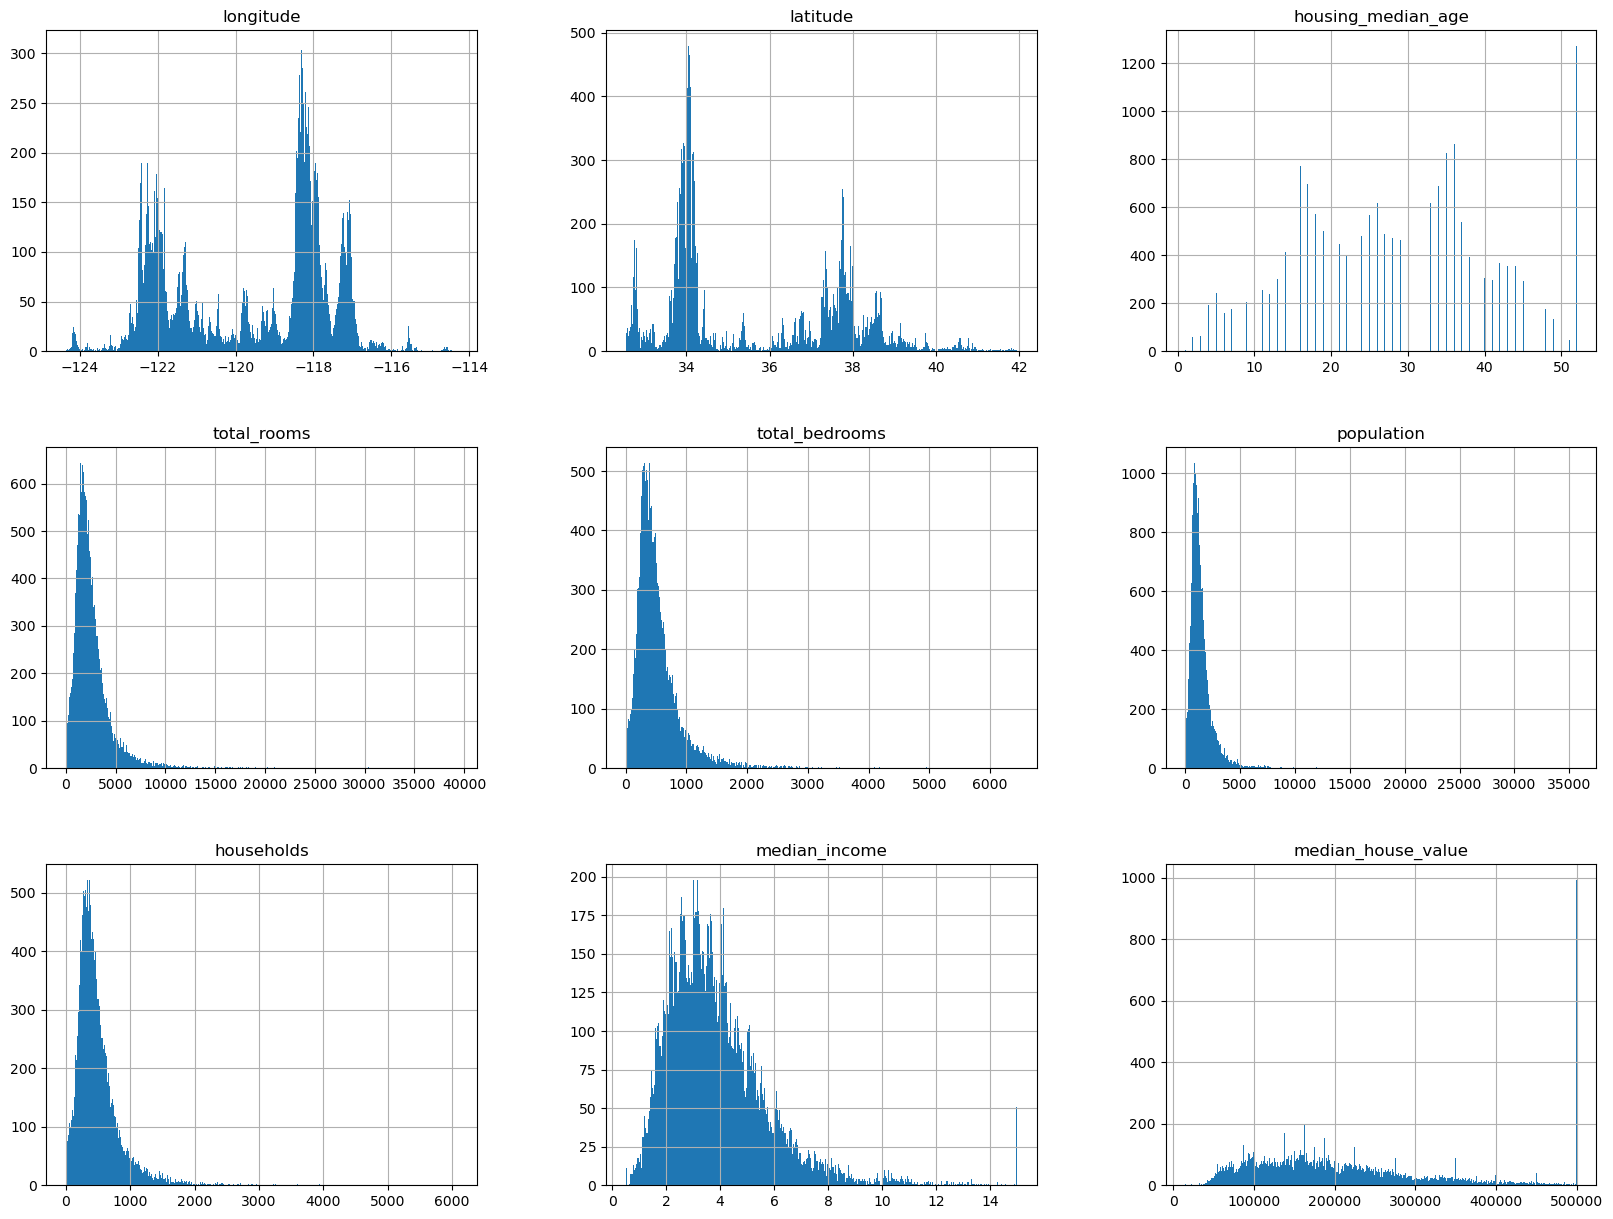

In [7]:
%matplotlib inline 
# only in a Jupyter notebook
import matplotlib.pyplot as plt
#bins represent the number of bins to be plotted
#figsize represent the figure size
housing.hist(bins=500, figsize=(20,15))
plt.show()

In [8]:
np.random.permutation(5)

array([2, 1, 0, 3, 4])

In [9]:
#train test spliting
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(housing, 0.2)

In [10]:
train_set.shape , test_set.shape

((16512, 10), (4128, 10))

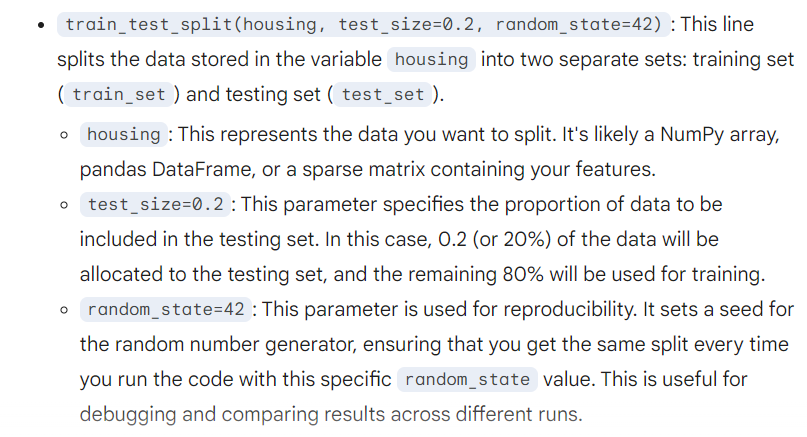

In [11]:
# using sklearn library
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [12]:
"""
pd.cut(): This function is used to bin continuous data into intervals. 
          In this case, it's being applied to the "median_income" column of the housing DataFrame.

bins=[0., 1.5, 3.0, 4.5, 6., np.inf]: These are the boundaries of the bins that you want to create. 
                                      Any value of "median_income" between 0 and 1.5 (exclusive) will fall into the first 
                                      category, between 1.5 and 3.0 into the second, and so on. The np.inf stands for 
                                      infinity, which means that any value above 6 falls into the last category.

labels=[1, 2, 3, 4, 5]: These are the labels for the bins. Instead of the default numeric bin names 
                        that pd.cut() would provide (which are intervals), this assigns each bin a 
                        discrete label from 1 to 5.

housing["income_cat"] = ...: This assigns the output of the pd.cut() function, which is a pandas Series with the categorical
                                labels, to a new column in the housing DataFrame called "income_cat"."""

housing["income_cat"] = pd.cut(housing["median_income"],
                                bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                labels=[1, 2, 3, 4, 5])

<Axes: >

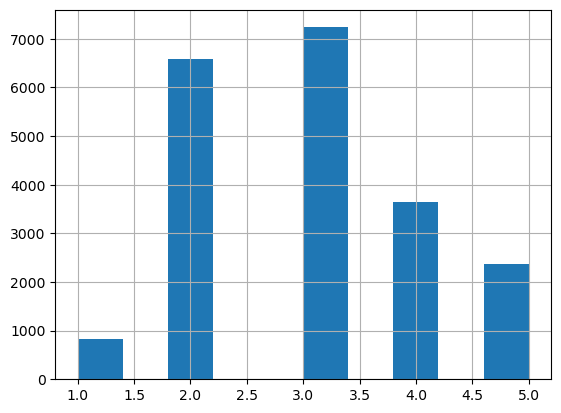

In [13]:
housing["income_cat"].hist()

In [14]:
#suppose that the column of median income is very important so we have visualized it 
# then we want to sample the dataset or in other word split train and test depending on the income_cat 
# so that the train and test dataset have the same distribution of income median

from sklearn.model_selection import StratifiedShuffleSplit
""" n_splits=1 means you're creating a single split (train and test set), 
test_size=0.2 means the test set will contain 20% of the data, and
random_state=42 ensures reproducibility of the results."""
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
"""split.split(housing, housing["income_cat"]): 
    This method generates indices to split data into training and test sets. 
    Data is split in a stratified fashion using the housing["income_cat"] for stratification. 
    This ensures that both the training and test sets have similar distributions of the income_cat categories."""
# we need the for loop because the return from split.split is generator not a list
# so to access the values we should iterate over it
for train_index, test_index in split.split(housing, housing["income_cat"]):
    print(train_index)
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

[12655 15502  2908 ... 19263 19140 19773]


In [15]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [16]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [17]:
#now no need for the income_cat column so we will drop it
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [18]:
strat_train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  median_house_value  \
12655      2237.0       706.0         2.1736             72100.0   
15502      2015.0       768.0         6.3373            279600.0   
2908        667.0       300.0         2.8750             82700.0   
14053       898.0       483.0         2.2264            112500.0   
20496      1837.0       580.0         4.4964            238300.0   
...           ...         ...            ...                 ...   
15174      2026.0      1001.0         5.0900            268500.0   
12661      4769.0      1418.0         2.8139             90400.0   
19263       458.0       172.0         3.1797            140400.0   
19140      1208.0       501.0         4.1964            258100.0   
19773       625.0       197.0         3.1319             62700.0   

      ocean_proximity  
12655          INLAND  
15502      NEAR OCEAN  
2908           INLAND  
14053      NEAR OCEAN  
20496       <1H OCEAN  
...               ...  
15174       <1H OCEAN  
12661          INLAND  
19263       <1H OCEAN  
19140       <1H OCEAN  
19773          INLAND  

[16512 rows x 10 columns]

In [35]:
#Let’s create a copy so that you can play with it without harming the training set:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

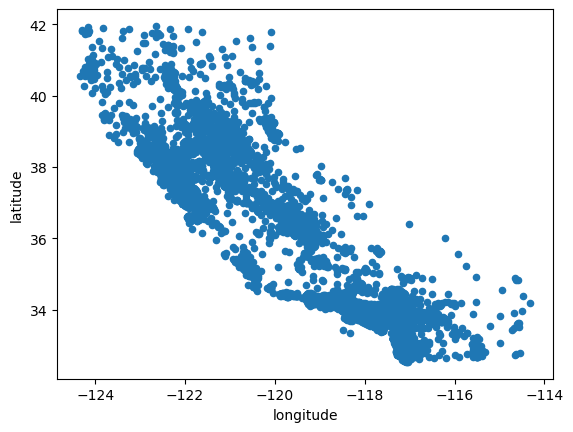

In [36]:
#kind represent the type of plot
#x represent the feature that will plotted on the x axis
# y is the feature that will be plotted on the y axis

housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

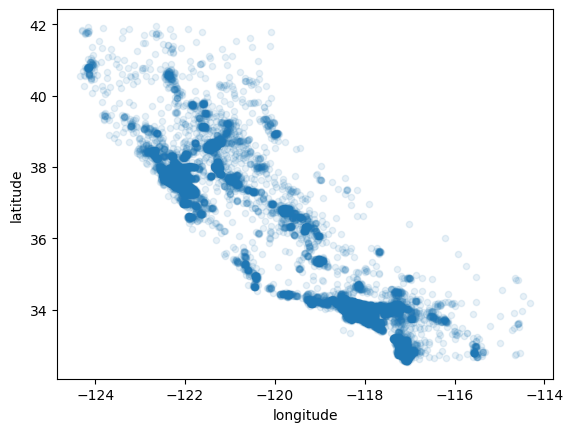

In [37]:
#alpha will add a new feature in the visualization which will make plot more darker at areas with more density
"""
Range: The alpha value can range from 0.0 to 1.0.

0.0 (fully transparent): Data points will be completely invisible.
1.0 (fully opaque): Data points will be completely solid, with no transparency.
Values between 0.0 and 1.0: Data points will have varying degrees of transparency. 
Lower values make them more transparent, allowing you to see overlapping points better.
"""

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

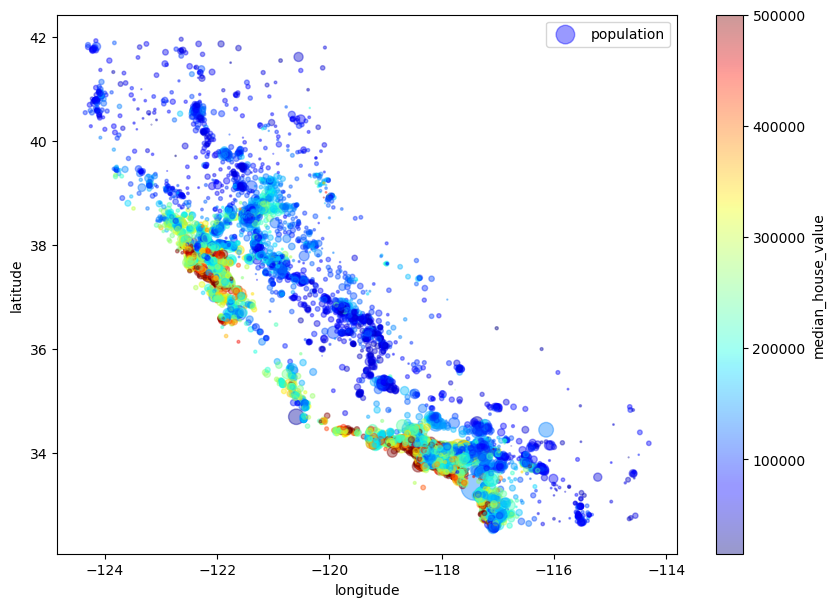

In [38]:
"""
s=housing["population"]/100: 
                This determines the size of each data point (marker) in the scatter plot. 
                The size is calculated by dividing the population value in each row of the "population" column by 100. 
                This means data points from areas with higher populations will be larger on the plot.
c="median_house_value": 
                This specifies the column that will be used to determine the color of each data point. 
                Here, the "median_house_value" column is used. 
                Points with higher median house values will likely be assigned different colors than 
                points with lower values.
Colormap and Legend:

cmap=plt.get_cmap("jet"): 
    This sets the colormap used to map the values in the "median_house_value" column to color variations in the plot. 
    The "jet" colormap is a popular choice for continuous data, transitioning from blue to yellow or red.
colorbar=True: 
    This adds a colorbar to the plot, which helps you interpret the relationship between the color of a data point 
    and the corresponding value in the "median_house_value" column.
"""


housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )
#adds a legend to the plot. The legend will display labels for each category or variable used 
#to determine the point size and color 
#(potentially "population" and a descriptive label for the colormap).
plt.legend()

In [39]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [40]:
housing.columns[:]

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [41]:
"""Since the dataset is not too large, you can easily compute the standard correlation
coefficient (also called Pearson’s r) between every pair of attributes using the corr()
method:"""
#we need first to exclude the categorical features

corr_matrix = housing[housing.columns[:-1]].corr()
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105823     0.048909   
latitude            -0.924478  1.000000            0.005737    -0.039245   
housing_median_age  -0.105823  0.005737            1.000000    -0.364535   
total_rooms          0.048909 -0.039245           -0.364535     1.000000   
total_bedrooms       0.076686 -0.072550           -0.325101     0.929391   
population           0.108071 -0.115290           -0.298737     0.855103   
households           0.063146 -0.077765           -0.306473     0.918396   
median_income       -0.019615 -0.075146           -0.111315     0.200133   
median_house_value  -0.047466 -0.142673            0.114146     0.135140   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076686    0.108071    0.063146      -0.019615   
latitude                 -0.072550   -0.115290   -0.077765      -0.075146   
housing_median_age       -0.325101   -0.298737   -0.306473      -0.111315   
total_rooms               0.929391    0.855103    0.918396       0.200133   
total_bedrooms            1.000000    0.876324    0.980167      -0.009643   
population                0.876324    1.000000    0.904639       0.002421   
households                0.980167    0.904639    1.000000       0.010869   
median_income            -0.009643    0.002421    0.010869       1.000000   
median_house_value        0.047781   -0.026882    0.064590       0.687151   

                    median_house_value  
longitude                    -0.047466  
latitude                     -0.142673  
housing_median_age            0.114146  
total_rooms                   0.135140  
total_bedrooms                0.047781  
population                   -0.026882  
households                    0.064590  
median_income                 0.687151  
median_house_value            1.000000

In [42]:
#print the column of median house value but in sorted form 
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

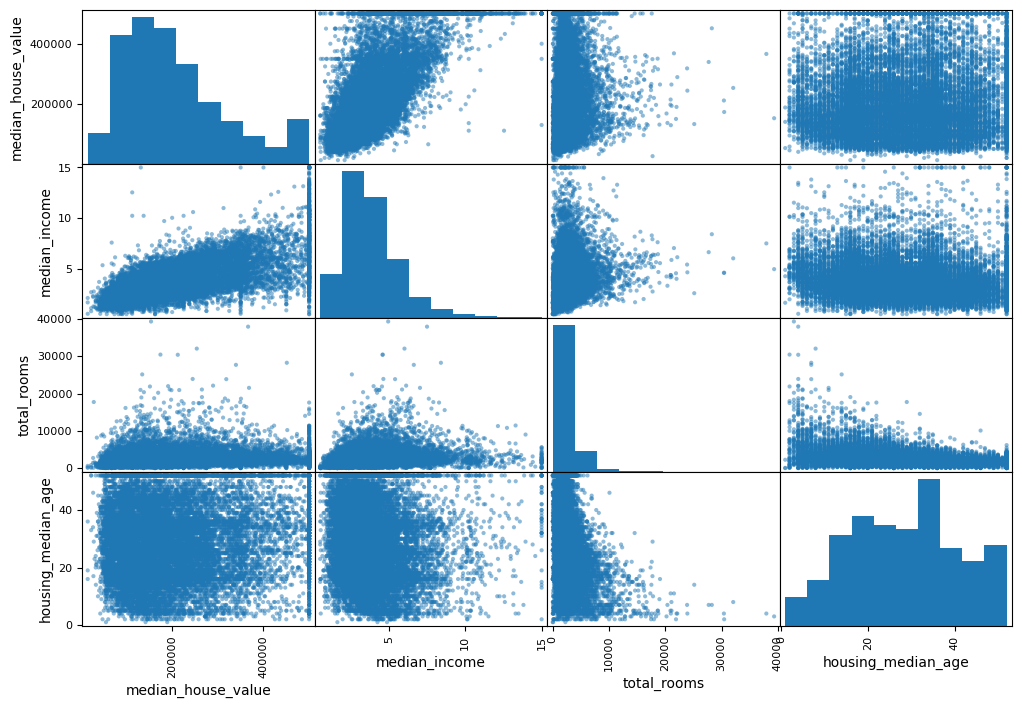

In [43]:
"""
Another way to check for correlation between attributes is to use the pandas scatter_matrix() function, 
which plots every numerical attribute against every other numerical attribute. Since there are now 11 numerical attributes,
you would get 112 = 121 plots, which would not fit on a page—so let’s just focus on a few promising
attributes that seem most correlated with the median housing value"""
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8));

<Axes: xlabel='median_income', ylabel='median_house_value'>

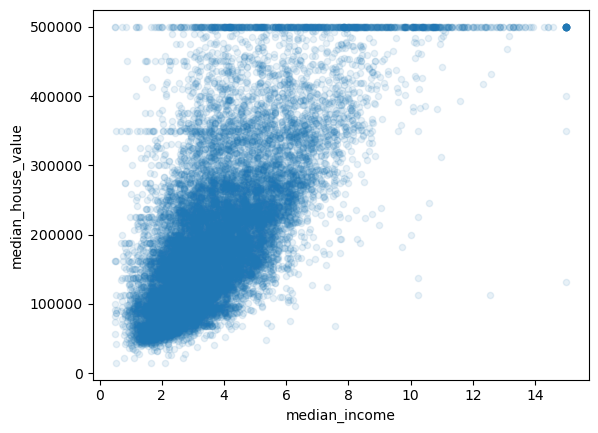

In [44]:
"""from the previouse plots it seems that: 
The most promising attribute to predict the median house value is the median income, 
so let’s zoom in on their correlation scatterplot """
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)


In [45]:
"""
One last thing you may want to do before preparing the data for Machine Learning algorithms is to try out various attribute combinations. 
For example:
    the total number of rooms in a district is not very useful if you don’t know how many households there are.
     What you really want is the number of rooms per household. 
     Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms.
     And the population per household also seems like aninteresting attribute combination to look at.
Let’s create these new attributes:"""

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [46]:
corr_matrix = housing.drop(labels = 'ocean_proximity' ,axis = 1).corr()
corr_matrix

longitude  latitude  housing_median_age  \
longitude                  1.000000 -0.924478           -0.105823   
latitude                  -0.924478  1.000000            0.005737   
housing_median_age        -0.105823  0.005737            1.000000   
total_rooms                0.048909 -0.039245           -0.364535   
total_bedrooms             0.076686 -0.072550           -0.325101   
population                 0.108071 -0.115290           -0.298737   
households                 0.063146 -0.077765           -0.306473   
median_income             -0.019615 -0.075146           -0.111315   
median_house_value        -0.047466 -0.142673            0.114146   
rooms_per_household       -0.028374  0.107665           -0.147184   
bedrooms_per_room          0.095645 -0.116955            0.136768   
population_per_household  -0.000415  0.005426            0.015031   

                          total_rooms  total_bedrooms  population  households  \
longitude                    0.048909        0.076686    0.108071    0.063146   
latitude                    -0.039245       -0.072550   -0.115290   -0.077765   
housing_median_age          -0.364535       -0.325101   -0.298737   -0.306473   
total_rooms                  1.000000        0.929391    0.855103    0.918396   
total_bedrooms               0.929391        1.000000    0.876324    0.980167   
population                   0.855103        0.876324    1.000000    0.904639   
households                   0.918396        0.980167    0.904639    1.000000   
median_income                0.200133       -0.009643    0.002421    0.010869   
median_house_value           0.135140        0.047781   -0.026882    0.064590   
rooms_per_household          0.127549        0.000426   -0.074665   -0.082971   
bedrooms_per_room           -0.192655        0.086883    0.037736    0.067090   
population_per_household    -0.024806       -0.028364    0.076232   -0.027411   

                          median_income  median_house_value  \
longitude                     -0.019615           -0.047466   
latitude                      -0.075146           -0.142673   
housing_median_age            -0.111315            0.114146   
total_rooms                    0.200133            0.135140   
total_bedrooms                -0.009643            0.047781   
population                     0.002421           -0.026882   
households                     0.010869            0.064590   
median_income                  1.000000            0.687151   
median_house_value             0.687151            1.000000   
rooms_per_household            0.311528            0.146255   
bedrooms_per_room             -0.624650           -0.259952   
population_per_household       0.021815           -0.021991   

                          rooms_per_household  bedrooms_per_room  \
longitude                           -0.028374           0.095645   
latitude                             0.107665          -0.116955   
housing_median_age                  -0.147184           0.136768   
total_rooms                          0.127549          -0.192655   
total_bedrooms                       0.000426           0.086883   
population                          -0.074665           0.037736   
households                          -0.082971           0.067090   
median_income                        0.311528          -0.624650   
median_house_value                   0.146255          -0.259952   
rooms_per_household                  1.000000          -0.398529   
bedrooms_per_room                   -0.398529           1.000000   
population_per_household            -0.005316           0.004284   

                          population_per_household  
longitude                                -0.000415  
latitude                                  0.005426  
housing_median_age                        0.015031  
total_rooms                              -0.024806  
total_bedrooms                           -0.028364  
population                                0.076232 

In [47]:
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [48]:
"""Hey, not bad! The new bedrooms_per_room attribute is much more correlated with
the median house value than the total number of rooms or bedrooms. 

Apparently
houses with a lower bedroom/room ratio tend to be more expensive. The number of
rooms per household is also more informative than the total number of rooms in a
district—obviously the larger the houses, the more expensive they are"""

'Hey, not bad! The new bedrooms_per_room attribute is much more correlated with\nthe median house value than the total number of rooms or bedrooms. \n\nApparently\nhouses with a lower bedroom/room ratio tend to be more expensive. The number of\nrooms per household is also more informative than the total number of rooms in a\ndistrict—obviously the larger the houses, the more expensive they are'

### Data Cleaning

In [49]:
# creat input and lables
housing = strat_train_set.drop("median_house_value", axis=1)# this represent the input features
housing_labels = strat_train_set["median_house_value"].copy()# will represent the the label [model output]

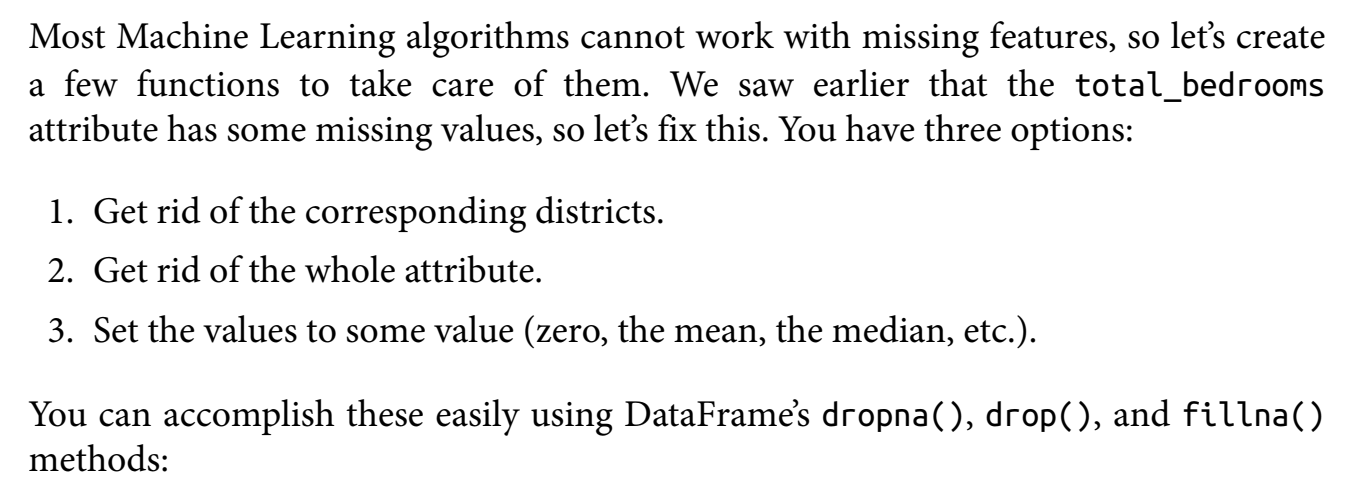

In [50]:
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

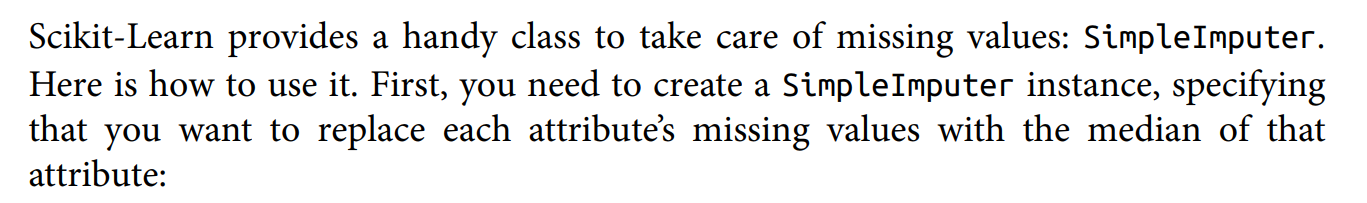

In [51]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
#we can not calculate the mean for categorical data so we will drop the ocean_proximity column
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [52]:
 imputer.statistics_#will display the mean values of each column using the imputer 

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [53]:
housing_num.median().values #another method to display the columns mean 

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [54]:
# this will return a numpy array contains the values of dataframe called housing_num with null values replaced by the mean value
X = imputer.transform(housing_num)
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [55]:
# to transform the numpy back to dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing_num.index)
housing_tr

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  
12655      2237.0       706.0         2.1736  
15502      2015.0       768.0         6.3373  
2908        667.0       300.0         2.8750  
14053       898.0       483.0         2.2264  
20496      1837.0       580.0         4.4964  
...           ...         ...            ...  
15174      2026.0      1001.0         5.0900  
12661      4769.0      1418.0         2.8139  
19263       458.0       172.0         3.1797  
19140      1208.0       501.0         4.1964  
19773       625.0       197.0         3.1319  

[16512 rows x 8 columns]

In [56]:
housing_tr.info()# we will note that there is no null values

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


## Handling Text and Categorical Attributes

In [57]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
1481         NEAR BAY
18125       <1H OCEAN
5830        <1H OCEAN
17989       <1H OCEAN
4861        <1H OCEAN

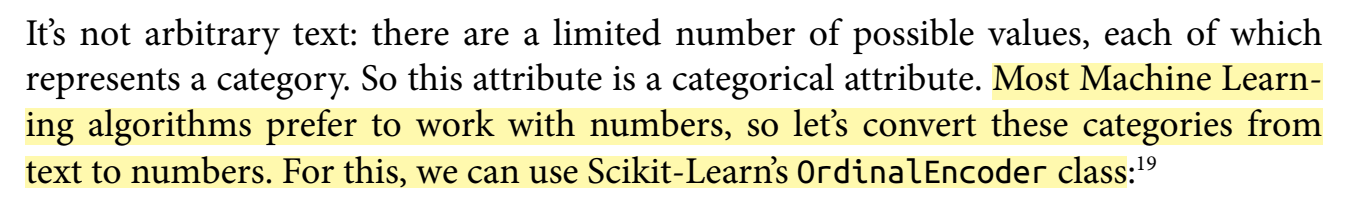

In [58]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [59]:
ordinal_encoder.categories_#to print all the categories

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [60]:
ordinal_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [61]:
ordinal_encoder.encoded_missing_value

nan

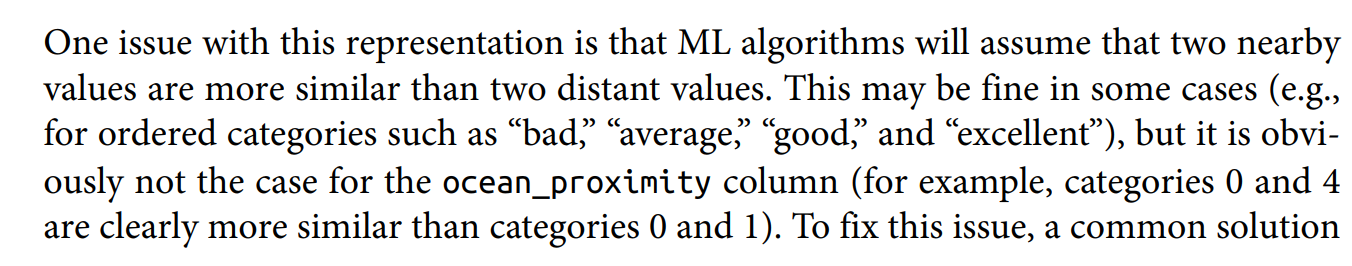

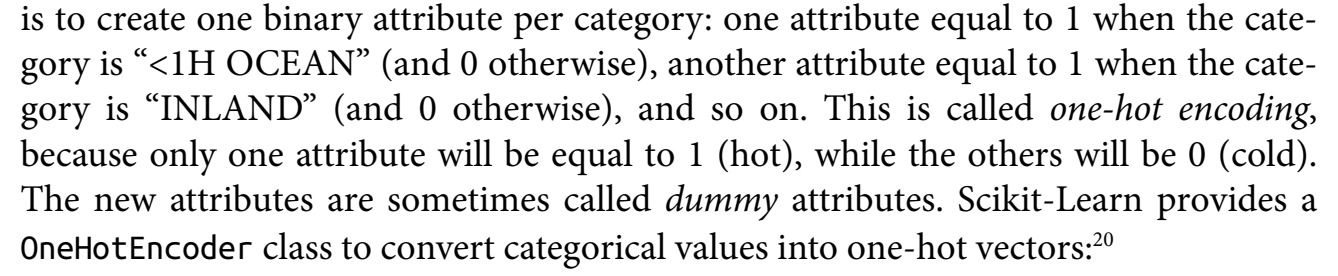

In [62]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

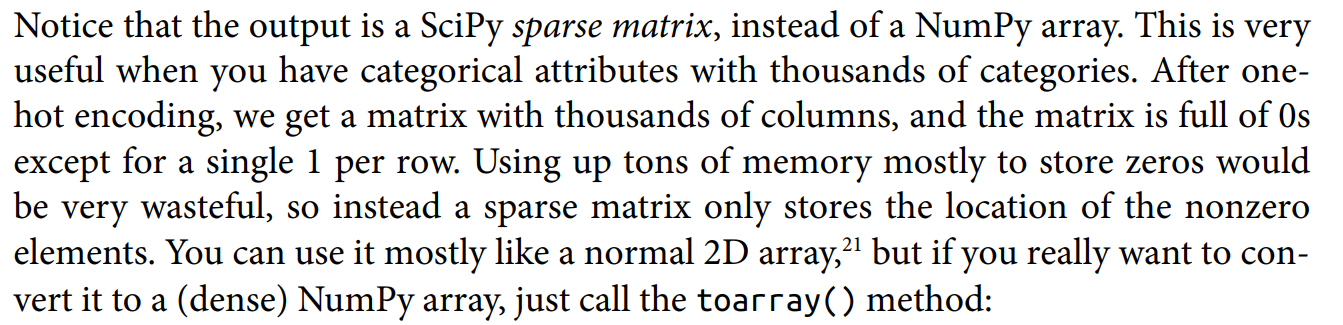

In [63]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [46]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

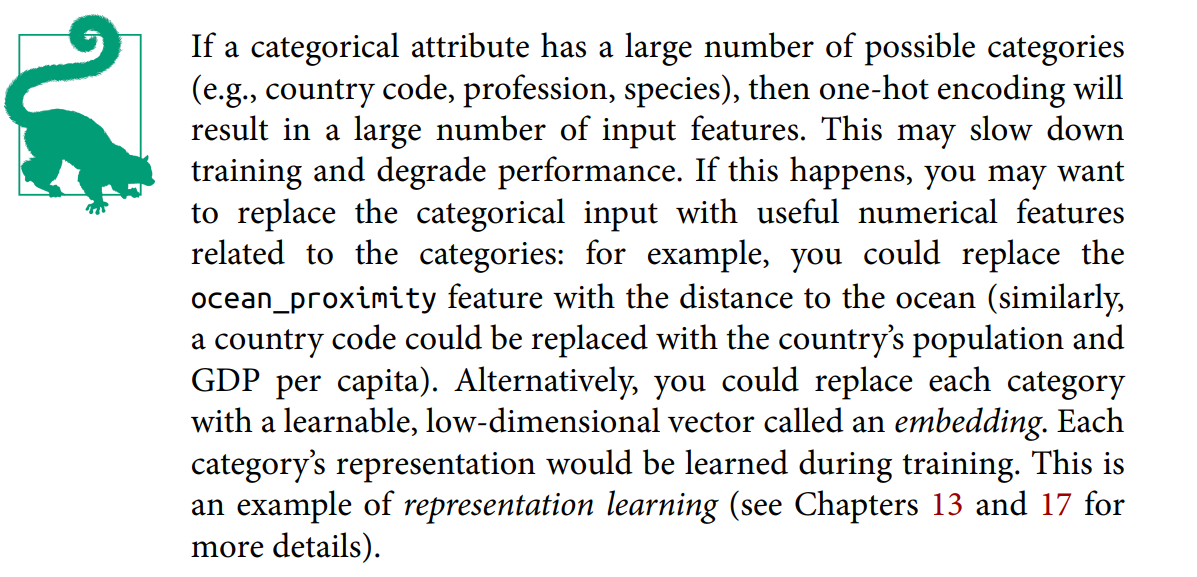

## Feature Scaling

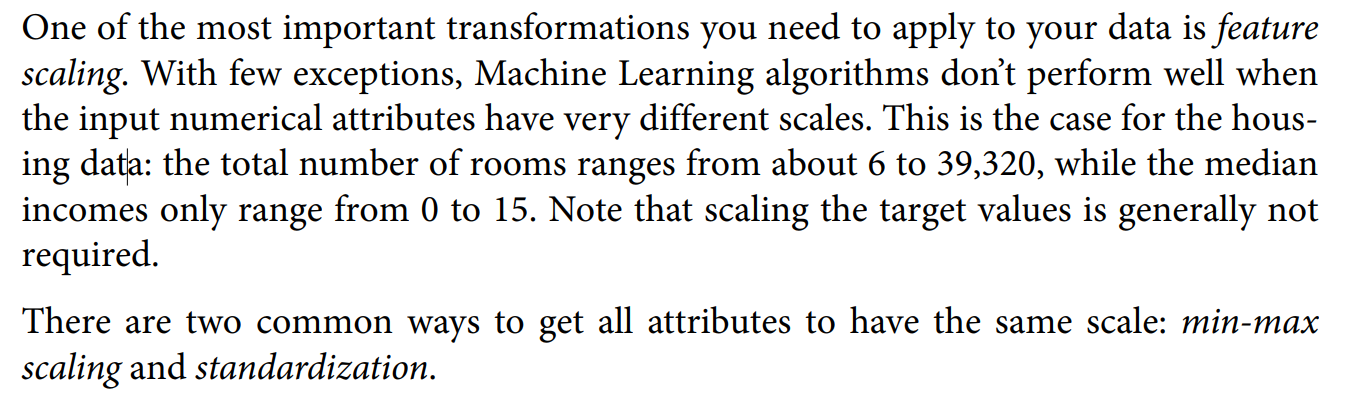
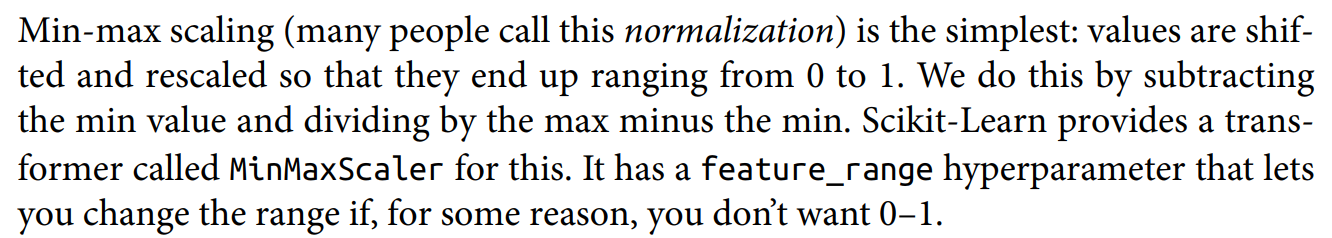
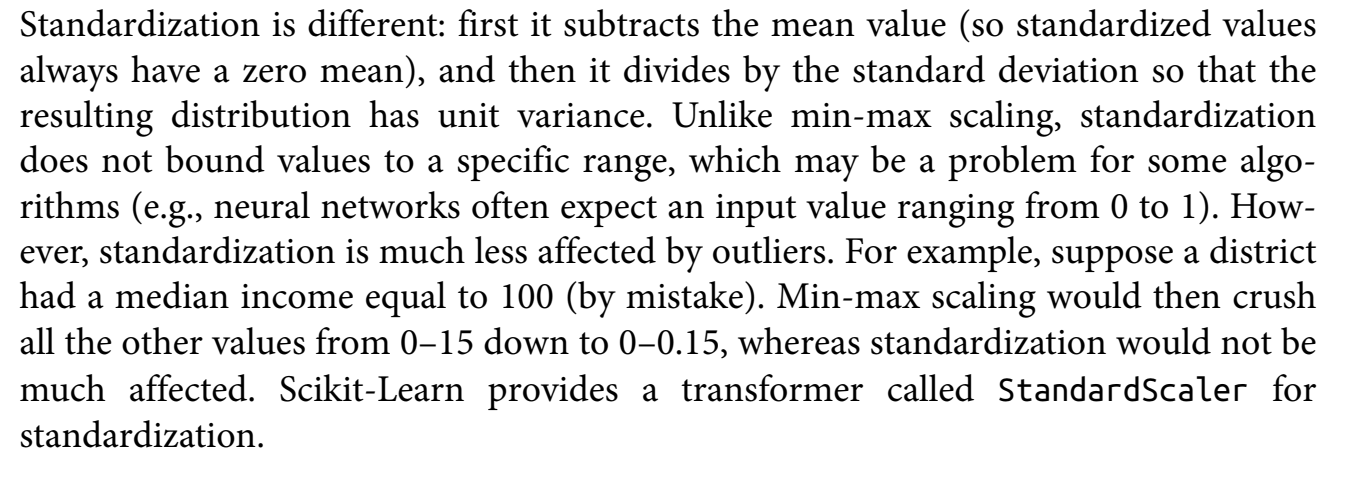

#### NOTE

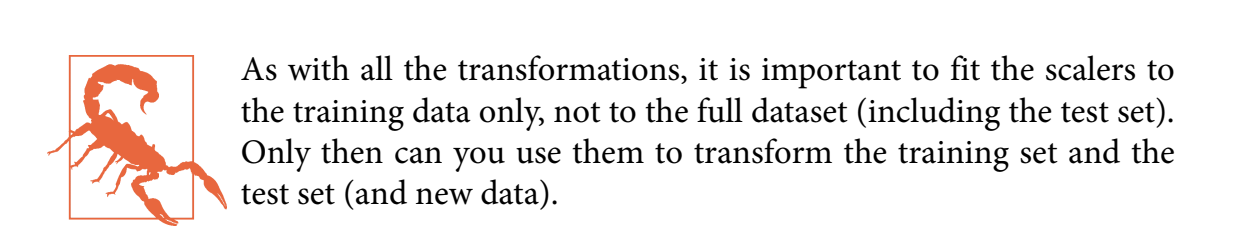

## Transformation Pipelines

In [66]:
#This imports the Pipeline class from scikit-learn's pipeline module. 
#Pipelines allow you to chain multiple data processing steps together.
from sklearn.pipeline import Pipeline 
"""This imports the StandardScaler class from scikit-learn's preprocessing module. 
StandardScaler is used to standardize features by removing the mean and scaling to unit variance."""
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                        ('std_scaler', StandardScaler()),
                        ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [67]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

In [68]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [69]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),
                                    ("cat", OneHotEncoder(), cat_attribs),
                                    ])
                                    
housing_prepared = full_pipeline.fit_transform(housing)

In [70]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [71]:
housing_prepared.shape

(16512, 13)

### Training and Evaluating on the Training Set

In [51]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [52]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 88983.14806384 305351.35385026 153334.71183453 184302.55162102
 246840.18988841]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [53]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69050.56219504567

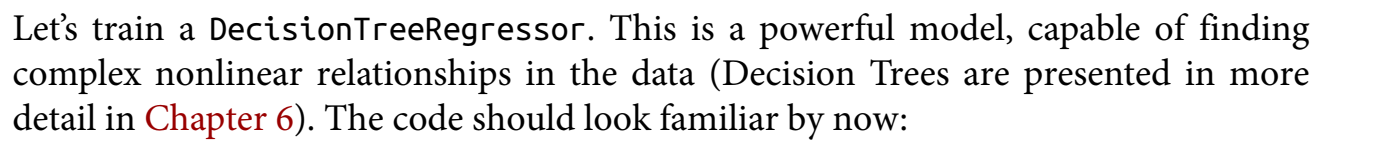


In [54]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [55]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

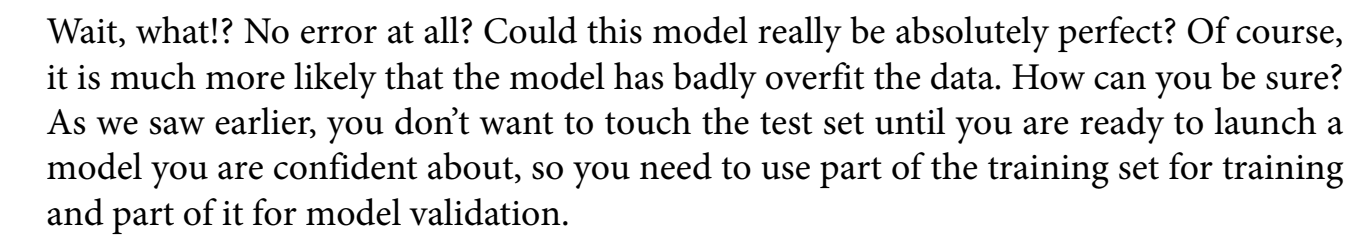

### Better Evaluation Using Cross-Validation

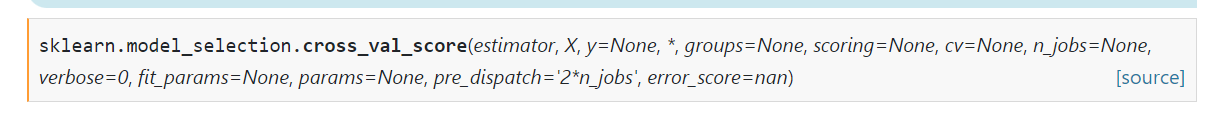

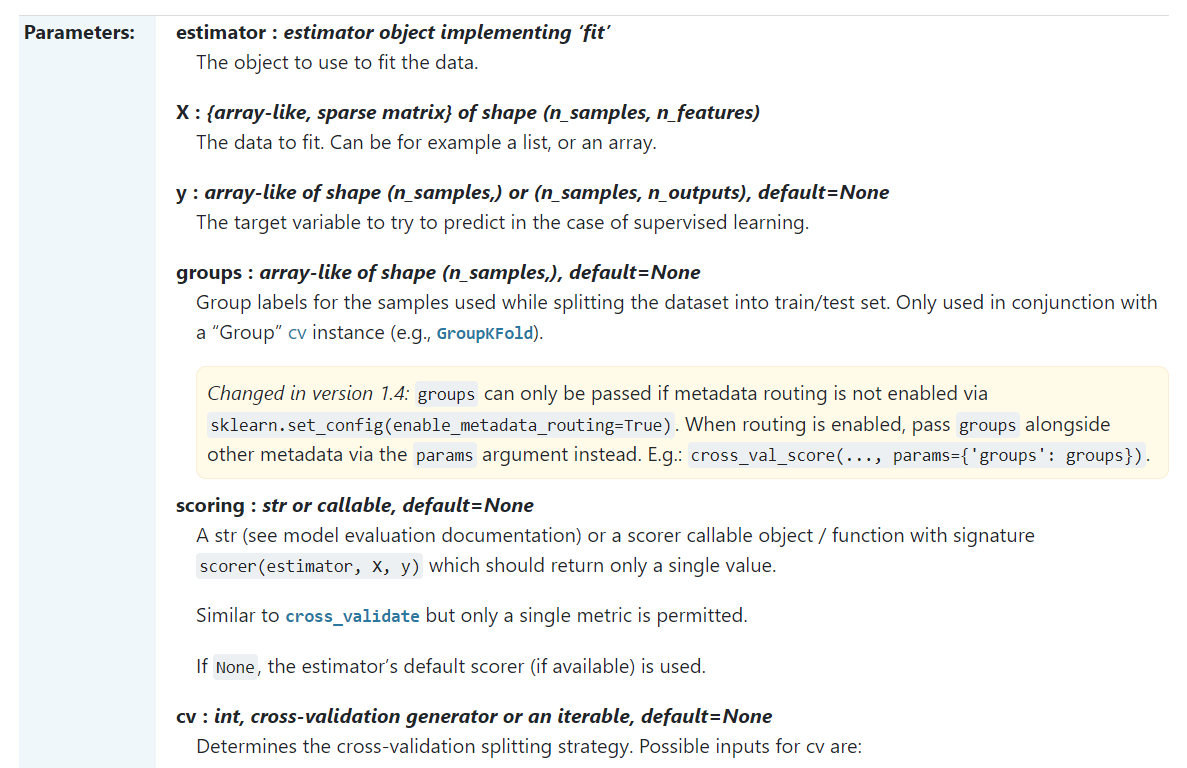

In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([70335.06051011, 68676.06852682, 64905.87829394, 69871.90666533,
       67601.97383166, 68468.20567544, 72517.52035371, 70412.77938313,
       66868.13830105, 69757.32589116])

In [57]:
tree_rmse_scores.mean() , tree_rmse_scores.std()

(68941.48574323356, 2027.3057727848638)

In [58]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [59]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [72229.03469752 65318.2240289  67706.39604745 69368.53738998
 66767.61061621 73003.75273869 70522.24414582 69440.77896541
 66930.32945876 70756.31946074]
Mean: 69204.32275494766
Standard deviation: 2372.07079105592


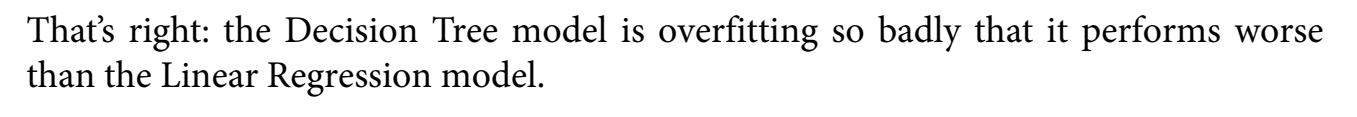

In [60]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_rmse = cross_val_score(forest_reg, housing_prepared, housing_labels,scoring="neg_root_mean_squared_error", cv=10)

forest_rmse

array([-50763.12280566, -49277.33181732, -46105.88279977, -50321.87126785,
       -47365.96519198, -49073.25396072, -51437.50235937, -48904.10775836,
       -47288.79246668, -53373.85009801])

In [61]:
display_scores(forest_rmse)

Scores: [-50763.12280566 -49277.33181732 -46105.88279977 -50321.87126785
 -47365.96519198 -49073.25396072 -51437.50235937 -48904.10775836
 -47288.79246668 -53373.85009801]
Mean: -49391.168052570465
Standard deviation: 2060.6672075114443


### To Save The Model

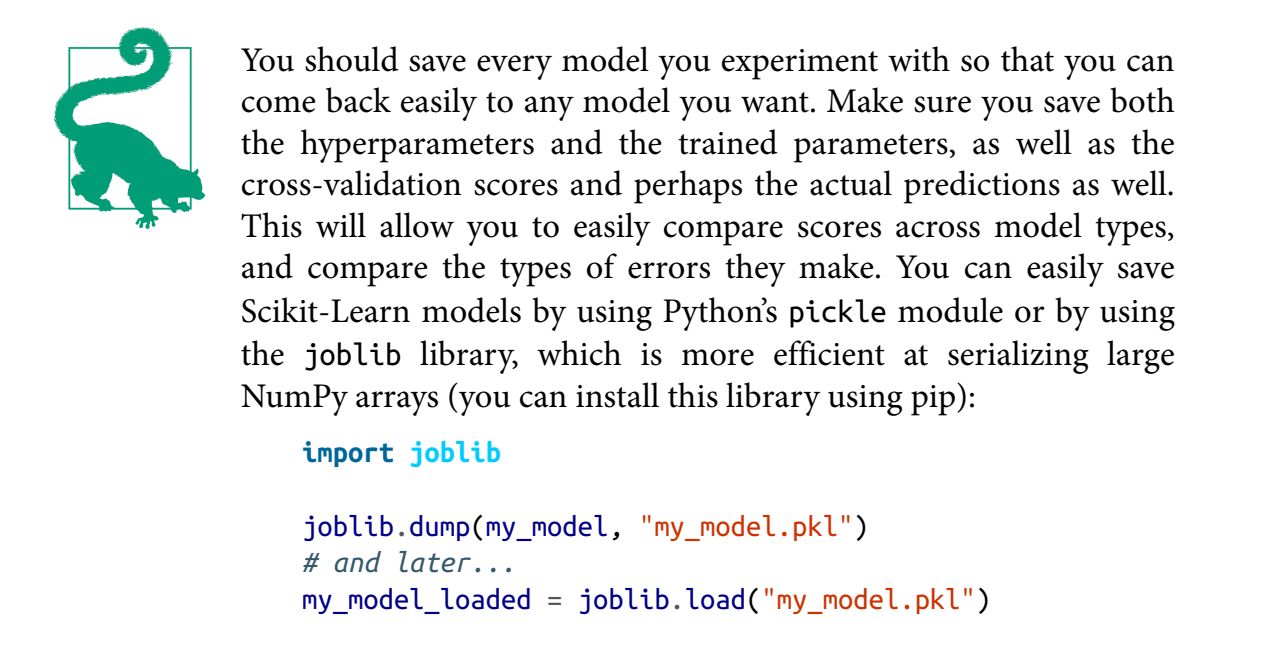

## Fine-Tune Your Model

### Grid Search

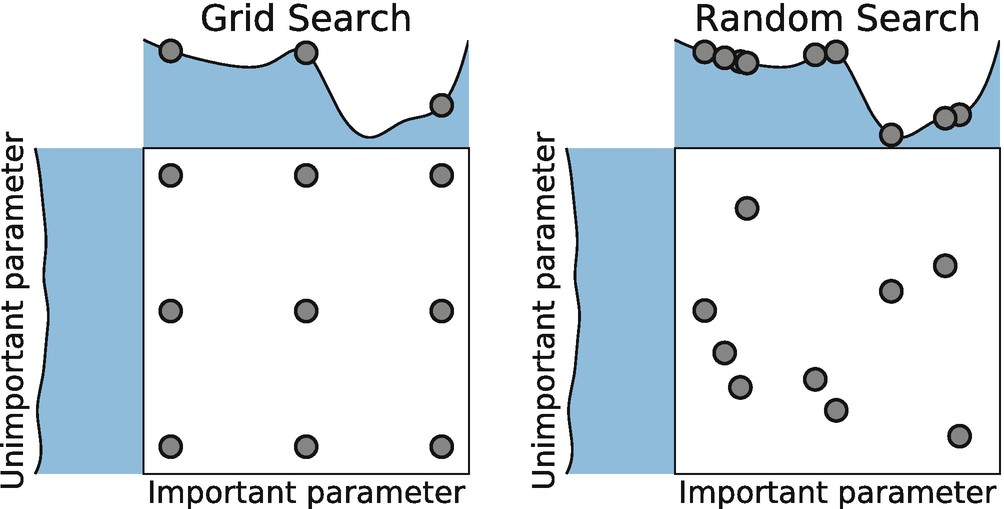

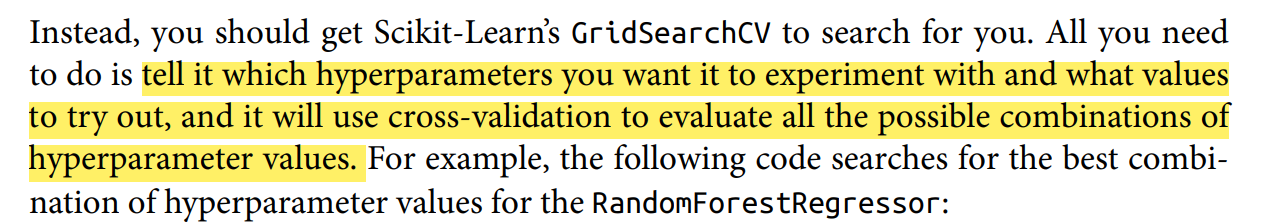

In [62]:
from sklearn.model_selection import GridSearchCV
""" 
Defines a grid of hyperparameters to search over. It's a list of dictionaries, 
where each dictionary corresponds to a set of hyperparameters to explore. 

The first dictionary contains combinations of n_estimators and max_features, 
while the second dictionary includes parameters for cases where bootstrap is set to False.
"""
#the values could be set to n_estimators are 3,10,30 and similarly the max_features could take 2,4,6,8
#the job of grid search is to get the best combination of the theses values
# the main difference in the second try is to bootstrap will be false
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]

forest_reg = RandomForestRegressor()
#here we will create the grid search object which will take the regressor to be tuned and will take the grid parameters
#the scoring criteria to choose the parameter corresponding it is the neg mean squared error
#and it will return the train score
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                            return_train_score=True)
#note that the grid search will try all possible combination of values then choose the one with lowest neg_mean_square value
grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [63]:

grid_search.best_params_


{'max_features': 8, 'n_estimators': 30}

In [66]:
print(grid_search.best_estimator_)


RandomForestRegressor(max_features=8, n_estimators=30)


In [65]:
#to print all the results for all combinations
cvres = grid_search.cv_results_# this is a dictionary contains two keys one for the result and one for the parameters
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64103.50920859577 {'max_features': 2, 'n_estimators': 3}
55000.5495588299 {'max_features': 2, 'n_estimators': 10}
52638.33140634241 {'max_features': 2, 'n_estimators': 30}
60068.27677229522 {'max_features': 4, 'n_estimators': 3}
52881.767363399355 {'max_features': 4, 'n_estimators': 10}
50402.84027905627 {'max_features': 4, 'n_estimators': 30}
59229.10675027864 {'max_features': 6, 'n_estimators': 3}
52760.379295788865 {'max_features': 6, 'n_estimators': 10}
50047.002294415746 {'max_features': 6, 'n_estimators': 30}
58810.881278989895 {'max_features': 8, 'n_estimators': 3}
52012.915015357175 {'max_features': 8, 'n_estimators': 10}
49989.30645406577 {'max_features': 8, 'n_estimators': 30}
62749.27605133314 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53854.04352382626 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59512.618869901904 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52548.80524344629 {'bootstrap': False, 'max_features': 3, 'n_estimators

## Randomized Search

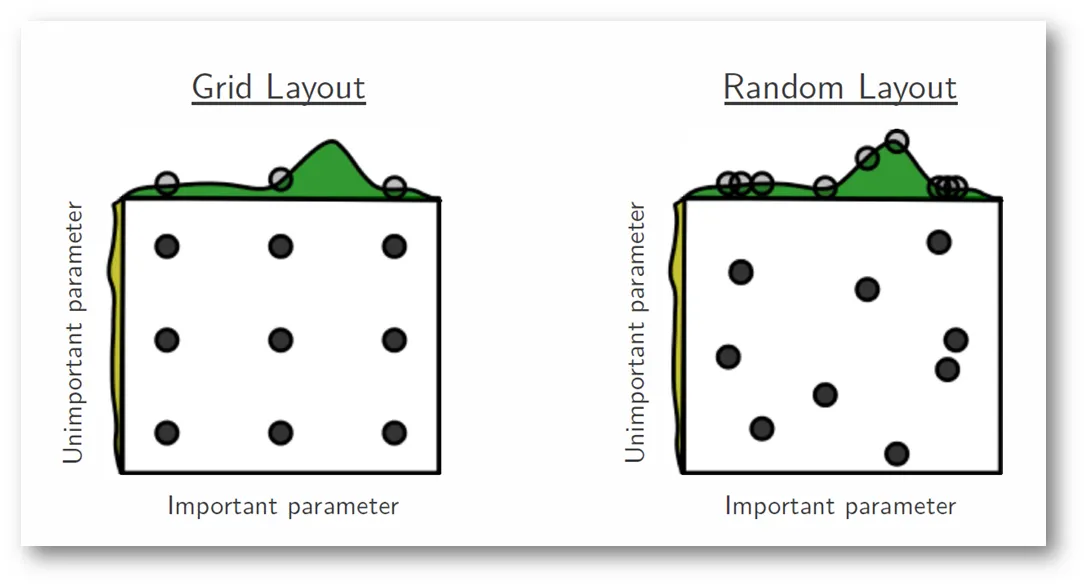

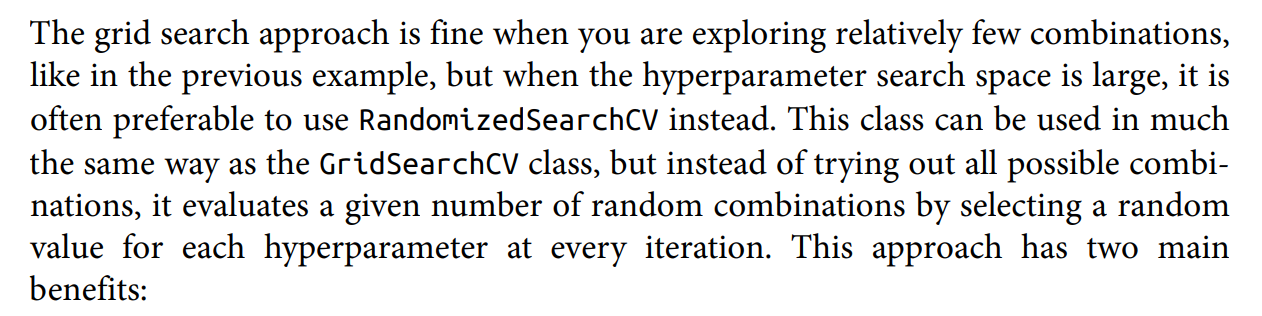

The key difference from grid search is in random search, not all the values are tested and values tested are selected at random.For example, if there are 500 values in the distribution and if we input n_iter=50 then random search will randomly sample 50 values to test. By doing that random search optimizes time spend and not defining an absolute grid allows it to explore other values in the given distribution.Since random search does not try every hyperparameter combination, it does not necessarily return the best performing values, but it returns a relatively good performing model in a significantly shorter time.

In [76]:
from sklearn.model_selection import RandomizedSearchCV

forest_reg_rs = RandomForestRegressor()
# specify distributions to sample from
param_dist = {'n_estimators': list(range(3, 30, 3)),'max_features': list(range(2, 8, 1)),'bootstrap': [True, False]}
                                                                          
# specify number of search iterations
n_iter = 10

# Instantiate RandomSearchCV
model_random_search = RandomizedSearchCV(estimator=forest_reg_rs,
                                         param_distributions=param_dist,
                                         n_iter=n_iter,
                                        scoring='neg_mean_squared_error',
                                        return_train_score=True)
# Fit the selected model
model_random_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [3, 6, 9, 12, 15, 18,
                                                         21, 24, 27]},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [77]:
print(model_random_search.best_params_)

{'n_estimators': 21, 'max_features': 7, 'bootstrap': False}


In [78]:
#to print all the results for all combinations
cvres = model_random_search.cv_results_# this is a dictionary contains two keys one for the result and one for the parameters
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

51552.8666262348 {'n_estimators': 12, 'max_features': 4, 'bootstrap': True}
52893.362117096745 {'n_estimators': 9, 'max_features': 4, 'bootstrap': False}
50394.07330941948 {'n_estimators': 24, 'max_features': 6, 'bootstrap': True}
50221.18525873313 {'n_estimators': 21, 'max_features': 6, 'bootstrap': False}
51235.90432654857 {'n_estimators': 27, 'max_features': 3, 'bootstrap': True}
50091.48902787451 {'n_estimators': 21, 'max_features': 5, 'bootstrap': False}
51470.3752782117 {'n_estimators': 9, 'max_features': 7, 'bootstrap': False}
49942.04950280415 {'n_estimators': 21, 'max_features': 7, 'bootstrap': False}
50127.96288646636 {'n_estimators': 24, 'max_features': 4, 'bootstrap': False}
50443.38142689983 {'n_estimators': 27, 'max_features': 7, 'bootstrap': True}


## Ensemble Methods

In [ ]:
ens_reg = GradientBoostingRegressor(random_state=0)
ens_reg.fit(X_train, y_train)
GradientBoostingRegressor(random_state=0)

## Analyze the Best Models and Their Errors

In [79]:
"""You will often gain good insights on the problem by inspecting the best models. For
example, the RandomForestRegressor can indicate the relative importance of each
attribute for making accurate predictions:"""
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.15397414e-01, 1.06397975e-01, 4.93167032e-02, 2.87422152e-02,
       2.64787251e-02, 3.65596340e-02, 2.44702360e-02, 4.29493001e-01,
       9.61189905e-03, 1.66211405e-01, 1.58522188e-05, 1.66377786e-03,
       5.64116255e-03])

In [81]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [82]:
extra_attribs

['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']

In [83]:
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [80]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]#to get the categorical encoder transformer
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)


[(0.42949300087418846, 'median_income'),
 (0.16621140529128972, 'pop_per_hhold'),
 (0.11539741381461982, 'longitude'),
 (0.10639797485342661, 'latitude'),
 (0.04931670318637732, 'housing_median_age'),
 (0.036559633996307225, 'population'),
 (0.02874221521475025, 'total_rooms'),
 (0.02647872506442712, 'total_bedrooms'),
 (0.024470236030616453, 'households'),
 (0.009611899050268142, 'rooms_per_hhold'),
 (0.005641162545642077, 'INLAND'),
 (0.0016637778592687611, '<1H OCEAN'),
 (1.5852218818206562e-05, 'bedrooms_per_room')]

### Evaluate Your System on the Test Set

In [84]:
final_model = grid_search.best_estimator_ #this will return the best model 
X_test = strat_test_set.drop("median_house_value", axis=1) #is to return the input 
y_test = strat_test_set["median_house_value"].copy() # is to return the target 
X_test_prepared = full_pipeline.transform(X_test) # transform the test dataset
final_predictions = final_model.predict(X_test_prepared) # to predict the output of the model
final_mse = mean_squared_error(y_test, final_predictions) # to calculate the difference between the actual and the predicted
final_rmse = np.sqrt(final_mse)# take the square the mean 

In [86]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))


array([45472.5469944 , 49294.87729012])